In [23]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from matplotlib import pyplot as plt

In [24]:
trans = transforms.ToTensor()
train_data = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
test_data = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [25]:
train_iter = data.DataLoader(train_data, batch_size=100, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(test_data, batch_size=100, shuffle=True,
                            num_workers=4)

In [26]:
from torch import nn

In [27]:
sequence_length = 28
input_size = 28
hidden_size = 128
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

In [28]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [29]:
class my_rnn(nn.Module):
        def __init__(self,input_size, hidden_size, batch_size, num_outputs):
            super(my_rnn,self).__init__()
            self.hidden_size = hidden_size
            self.U = nn.Linear(input_size, hidden_size)
            self.W = nn.Linear(hidden_size, hidden_size)
            self.V = nn.Linear(hidden_size, num_outputs)
        def forward(self,X):
            X = X.reshape(-1, X.size(2),X.size(3))
            sequence_len = X.size(1)
            A = torch.rand(X.size(0), self.hidden_size)
            for i in range(sequence_len):
                input1 = X[:, i, :]
                input1 = self.U(input1)
                input2 = self.W(A)
                A = torch.relu(input1 + input2)
            return softmax(self.V(A))

In [30]:
model = my_rnn(input_size, hidden_size, batch_size, num_classes)
print(model)

my_rnn(
  (U): Linear(in_features=28, out_features=128, bias=True)
  (W): Linear(in_features=128, out_features=128, bias=True)
  (V): Linear(in_features=128, out_features=10, bias=True)
)


In [31]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

In [32]:
loss_func = cross_entropy

In [44]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

Epoch [1/2], Step [100/600], Loss: nan
Epoch [1/2], Step [200/600], Loss: nan
Epoch [1/2], Step [300/600], Loss: nan
Epoch [1/2], Step [400/600], Loss: nan
Epoch [1/2], Step [500/600], Loss: nan
Epoch [1/2], Step [600/600], Loss: nan
Epoch [2/2], Step [100/600], Loss: nan
Epoch [2/2], Step [200/600], Loss: nan
Epoch [2/2], Step [300/600], Loss: nan
Epoch [2/2], Step [400/600], Loss: nan
Epoch [2/2], Step [500/600], Loss: nan
Epoch [2/2], Step [600/600], Loss: nan


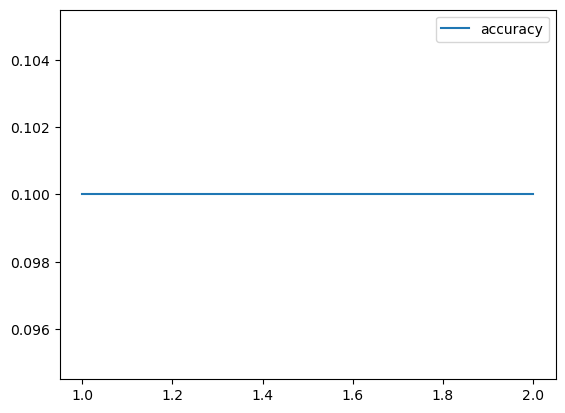

In [45]:
def train(num_epochs, model):
        
    # Train the model
    total_step = 600
    correct_rate=[]   
    for epoch in range(num_epochs):
        correct = 0
        total = 0
        for i, (images,labels) in enumerate(train_iter):
            
            # Forward pass
            outputs = model(images)
            y_hat = outputs.argmax(axis = 1)
            cmp = y_hat == labels
            correct += cmp.sum().item()
            total += batch_size
            loss = loss_func(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.mean().backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.mean()))
                pass
        
        correct_rate.append(correct/total)
    plt.plot(list(range(1,num_epochs + 1)), correct_rate,label = 'accuracy')
    plt.xlabel = 'epoch'
    plt.legend()
train(num_epochs, model)

In [41]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_iter:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 71.17 %
